Test plot
<_csv.reader object at 0x00000041575DDE80> None


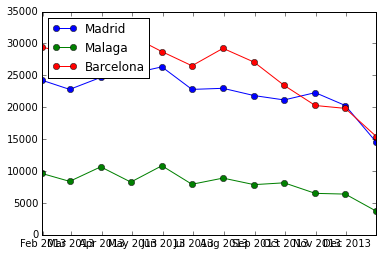

In [72]:
#!/usr/bin/python
# vim: set fileencoding=utf-8 :
%matplotlib inline


import os
import sys
import getopt
import gzip
import bz2
import csv, codecs
import itertools
import operator

import pylab
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import datetime

from itertools import groupby


mal={}

mad={}

bcn={}

def get_month(d):
    return datetime.datetime.strptime(d, '%Y-%m-%d').month


dest=[]
dest_dates=[]
visits=[]

def count_lines2(file_name):
    fd = bz2.BZ2File(file_name, 'rb')
    c = codecs.iterdecode(fd, "utf-8")

    n = 0
    print ("Test plot")
    reader = csv.reader(c, delimiter='^')
    print(reader, None)  # skip header

    p=0
    maliste = []
    for line in reader :  
        p = p + 1
        
        if(len(line)>6 and p!=1 and line[6] in ("MAD","BCN","AGP")):
            dest.append(line[6].strip())
           # print(line[0])
            dest_dates.append(datetime.datetime.strptime(line[0].strip(),'%Y-%m-%d'))
            visits.append(1)
        
       # if(p>100000):
        #    return 0
      #  if(p>=999999):
       #     return 0
        
        
        
        #print("fin du test")

count_lines2(r'C:\Users\piepie\Downloads\searches.csv.bz2')

#print(len(dest))
#print(len(dest_dates))
#create a DataFrame
df = pd.DataFrame({'destination':dest, 'dest_dates':dest_dates, 'visits':visits})

#print(df)

#group by the same destination with a index, and group all dates for the same month
tt = df.set_index('dest_dates').groupby('destination').resample('M', how='sum')
#print(tt.head())


dates_datetime1=[]
dates_datetime2=[]
dates_datetime3=[]
listmad=[]
listbcn=[]
listmal=[]

for mm in tt.itertuples():
    
    if(mm[0][0]=="MAD"):
        listmad.append(mm[1])
        dates_datetime1.append(mm[0][1])
    elif(mm[0][0]=="BCN"):
        listbcn.append(mm[1])
        dates_datetime2.append(mm[0][1])
    else:
        listmal.append(mm[1])
        dates_datetime3.append(mm[0][1])
        

dates_float1 = matplotlib.dates.date2num(dates_datetime1)
dates_float2 = matplotlib.dates.date2num(dates_datetime2)
dates_float3 = matplotlib.dates.date2num(dates_datetime3)

plt.plot_date(dates_float1, listmad, linestyle='-', xdate=True, ydate=False)
plt.plot_date(dates_float2, listmal, linestyle='-', xdate=True, ydate=False)
plt.plot_date(dates_float3, listbcn, linestyle='-', xdate=True, ydate=False)

plt.legend(['Madrid', 'Malaga','Barcelona'], loc='upper left')



pylab.show()

